In [1]:
import torch
from torch import (optim, nn)

from torch.utils.data import (
    DataLoader,
    TensorDataset,
    random_split
)

import numpy as np

# User-defined classes
from utils.base import (
    LogisticRegression,
    Trainer
)

# User-defined functions
from utils.preprocess import clusters, onehot

# Plotting
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")
plt.rcParams["font.family"] = "monospace"

In [2]:
# import os
# from dotenv import load_dotenv
# load_dotenv("environment.env")
# print(os.getenv("GITHUB_ACCESS_TOKEN"))

In [3]:
# Constants
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DTYPE = torch.float32
BATCH_SIZE = 32
NUM_EPOCHS = 20
SIZE = 100
GENERATOR = torch.Generator().manual_seed(42)

print(f"Device has ben set to: {torch.cuda.get_device_properties(DEVICE).name}")

Device has ben set to: NVIDIA GeForce RTX 4060 Laptop GPU


In [4]:
X, y = clusters(SIZE, means=[(-3, -3), (2, 2), (-2, 2)], stds=[0.8, 0.6, 0.7])

In [5]:
print("Generated X:", X, "\nGenerated y:", y, sep='\n')
print("\nShape of X: ", X.shape, "\nShape of y: ", y.shape, sep='\n')

Generated X:
tensor([[-4.1377, -2.3862],
        [-1.3878, -3.1170],
        [-4.1283, -4.2057],
        [-4.2876, -2.0837],
        [-3.4840, -2.6216],
        [-3.7149, -2.5324],
        [-2.6405, -3.0482],
        [-4.4972, -1.2737],
        [-4.0243, -2.2215],
        [-2.0330, -2.7180],
        [-5.4198, -1.7290],
        [-2.8938, -1.5106],
        [-4.6466, -3.0154],
        [-3.8856, -4.3290],
        [-3.4156, -3.3333],
        [-2.7229, -3.9244],
        [-2.5321, -2.9585],
        [-1.4421, -3.2701],
        [-4.7081, -3.0674],
        [-2.8540, -2.5597],
        [-3.1443, -2.3001],
        [-3.2383, -4.5800],
        [-4.0919, -2.7249],
        [-1.1586, -2.4256],
        [-2.8987, -4.3031],
        [-3.3397, -2.6405],
        [-2.1215, -3.1011],
        [-3.0056, -3.3754],
        [-3.2538, -4.0058],
        [-2.9069, -1.5510],
        [-2.7997, -4.5525],
        [-4.3207, -3.3436],
        [-2.7701, -1.3845],
        [-3.0729, -5.0036],
        [-2.4570, -3.0895],
       

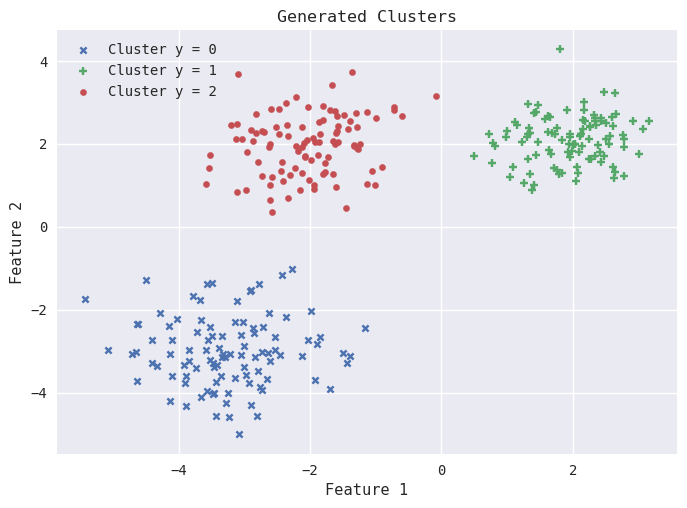

In [6]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='Cluster y = 2', s=20)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Clusters')
plt.show()

In [7]:
y_encoded = onehot(y.int(), 3)
print(f"New y (One-Hot Encoded):\n{y_encoded}")

New y (One-Hot Encoded):
tensor([[1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
        [1., 0., 0.],
       

In [8]:
Model = LogisticRegression(in_dims=2, out_dims=3, multinomial=True).to(DEVICE)

In [9]:
Data = TensorDataset(X, y_encoded)
Data.tensors

(tensor([[-4.1377, -2.3862],
         [-1.3878, -3.1170],
         [-4.1283, -4.2057],
         [-4.2876, -2.0837],
         [-3.4840, -2.6216],
         [-3.7149, -2.5324],
         [-2.6405, -3.0482],
         [-4.4972, -1.2737],
         [-4.0243, -2.2215],
         [-2.0330, -2.7180],
         [-5.4198, -1.7290],
         [-2.8938, -1.5106],
         [-4.6466, -3.0154],
         [-3.8856, -4.3290],
         [-3.4156, -3.3333],
         [-2.7229, -3.9244],
         [-2.5321, -2.9585],
         [-1.4421, -3.2701],
         [-4.7081, -3.0674],
         [-2.8540, -2.5597],
         [-3.1443, -2.3001],
         [-3.2383, -4.5800],
         [-4.0919, -2.7249],
         [-1.1586, -2.4256],
         [-2.8987, -4.3031],
         [-3.3397, -2.6405],
         [-2.1215, -3.1011],
         [-3.0056, -3.3754],
         [-3.2538, -4.0058],
         [-2.9069, -1.5510],
         [-2.7997, -4.5525],
         [-4.3207, -3.3436],
         [-2.7701, -1.3845],
         [-3.0729, -5.0036],
         [-2.4

In [10]:
trainData, valData = random_split(Data, (0.8, 0.2), generator=GENERATOR)

trainLoader = DataLoader(trainData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)
valLoader = DataLoader(valData, batch_size=BATCH_SIZE, generator=GENERATOR, shuffle=True)

In [11]:
trainer = Trainer(
    Model,
    trainLoader,
    valLoader,
    optimizer=optim.SGD(Model.parameters(), lr=.1),
    criterion=nn.CrossEntropyLoss(reduction='mean'),        # Cross-entropy Loss (For classification)
    device=DEVICE
)

In [12]:
train_loss, val_loss = trainer.train(num_epochs=NUM_EPOCHS)

Epoch 20/20 | Train Loss: 0.5871 | Val Loss: 0.5852: 100%|██████████| 20/20 [00:00<00:00, 41.15it/s]


In [13]:
print("Train Loss:", train_loss, "\nValidation Loss:", val_loss, sep='\n')

Train Loss:
{1: 1.2550464868545532, 2: 1.027916632592678, 3: 0.9252384528517723, 4: 0.8651420399546623, 5: 0.8030166104435921, 6: 0.7331529855728149, 7: 0.6843153834342957, 8: 0.6550481766462326, 9: 0.6338715925812721, 10: 0.6232855096459389, 11: 0.6169064342975616, 12: 0.6089669317007065, 13: 0.6041307672858238, 14: 0.601192981004715, 15: 0.5989428609609604, 16: 0.5949992537498474, 17: 0.5918651670217514, 18: 0.5906148627400398, 19: 0.589150682091713, 20: 0.5870763957500458}

Validation Loss:
{1: 1.0382568836212158, 2: 0.8910046517848969, 3: 0.8217794001102448, 4: 0.7796466052532196, 5: 0.729983925819397, 6: 0.6781478822231293, 7: 0.646995484828949, 8: 0.633120596408844, 9: 0.6209794282913208, 10: 0.6143217384815216, 11: 0.6070403456687927, 12: 0.6029053032398224, 13: 0.5991803407669067, 14: 0.5969609618186951, 15: 0.5936287045478821, 16: 0.5919061303138733, 17: 0.5904870927333832, 18: 0.5887735486030579, 19: 0.5862584114074707, 20: 0.5851947069168091}


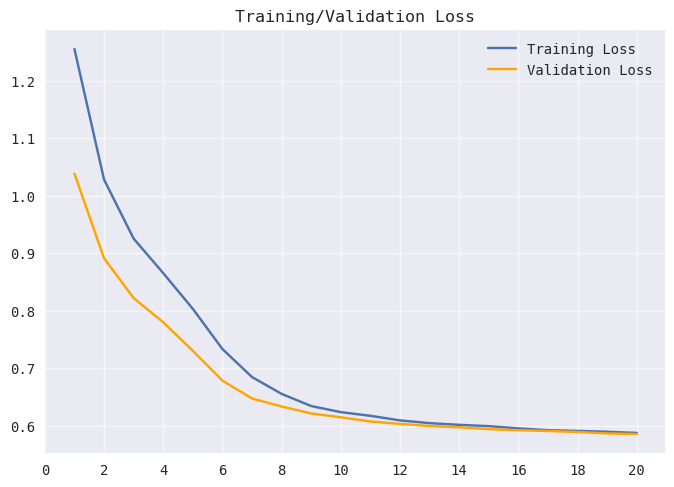

In [14]:
plt.plot(
    train_loss.keys(),
    train_loss.values(),
    label="Training Loss"
);
plt.plot(
    val_loss.keys(),
    val_loss.values(),
    color="orange",
    label="Validation Loss"
);
plt.xticks(np.linspace(0, 20, 11));
plt.grid(True, alpha = .6);
plt.title("Training/Validation Loss");
plt.legend(loc='best');
plt.show()

In [15]:
print(f"Predicted Model Parameters:", "Weights: {}".format(Model.linear.weight), "Bias: {}".format(Model.linear.bias), sep="\n")

Predicted Model Parameters:
Weights: Parameter containing:
tensor([[-0.4912, -0.7024],
        [ 0.8877,  0.7493],
        [-1.0269,  1.1795]], device='cuda:0', requires_grad=True)
Bias: Parameter containing:
tensor([ 0.5204,  0.4520, -0.2915], device='cuda:0', requires_grad=True)


In [16]:
print(f"Shapes for Weight and Bias Tensors:", Model.linear.weight.shape, Model.linear.bias.shape, sep="\n")

Shapes for Weight and Bias Tensors:
torch.Size([3, 2])
torch.Size([3])


In [17]:
weights = Model.linear.weight.detach().cpu().numpy()
biases = Model.linear.bias.detach().cpu().numpy()

Xmin, Xmax = X[:, 0].min() - .5, X[:, 0].max() + .5
ymin, ymax = X[:, 1].min() - .5, X[:, 1].max() + .5

In [18]:
xx, yy = np.meshgrid(np.linspace(Xmin, Xmax, SIZE), np.linspace(ymin, ymax, SIZE))
grid = np.c_[xx.flatten(), yy.flatten()]

scores = grid @ weights.T + biases

In [19]:
predicted_classes = np.argmax(scores, axis=1).reshape(xx.shape)

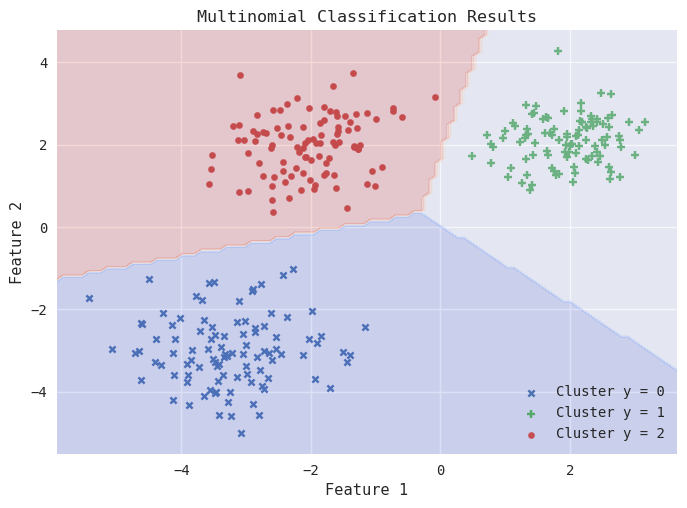

In [20]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='Cluster y = 0', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='Cluster y = 1', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='Cluster y = 2', s=20)

plt.contourf(xx, yy, predicted_classes, alpha=0.2, cmap=plt.cm.coolwarm)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Multinomial Classification Results");
plt.legend(loc='lower right');
plt.show();

In [21]:
# Testing on a New Instance
Xn = torch.tensor([-3.77690, 0.007854], dtype=DTYPE, device='cpu').unsqueeze(0)
print(f"New Instance:", Xn, Xn.shape, sep='\n')

New Instance:
tensor([[-3.7769,  0.0079]])
torch.Size([1, 2])


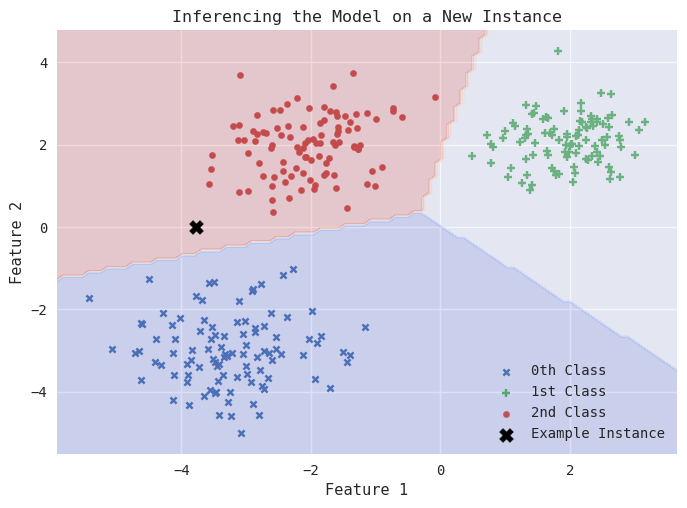

In [22]:
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], marker='x', label='0th Class', s=20)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], marker='+', label='1st Class', s=40)
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], marker='o', label='2nd Class', s=20)

plt.contourf(xx, yy, predicted_classes, alpha=0.2, cmap=plt.cm.coolwarm)

# New instance
plt.scatter(Xn[:, 0], Xn[:, 1], marker='X', label="Example Instance", s=100, c='black')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title("Inferencing the Model on a New Instance");
plt.legend(loc='lower right');
plt.show();

In [23]:
yn = Model(Xn.to(DEVICE))
print(f"Resulting predictions:\n{yn}")
print(f"Shape of prediction tensor: {yn.shape}")

Resulting predictions:
tensor([[0.2266, 0.0012, 0.7723]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Shape of prediction tensor: torch.Size([1, 3])


In [24]:
probs = [f"{prob.item() * 100:.2f}%" for prob in yn.squeeze()]
print("Probabilities:", probs, sep='\n')

Probabilities:
['22.66%', '0.12%', '77.23%']


In [25]:
torch.argmax(yn, dim=1)

tensor([2], device='cuda:0')